***Sentiment Analysis of COVID-19 Tweets – Visualization***


Import Required Modules

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import re
import nltk

**Extracting Data**

A dictionary to store date of data source as string

In [48]:
Tweet_Date = []


Another dictionary to store all data frames of tweet infomation

In [49]:
Tweet_Dict = {}

This dataset contains 20 files including Tweet information on 15 different days, country information and hashtag information. Further, We have skipped some of the files which are listed below:
1. The file "Countires", because most of the location information in this dataset is missing, so it doesn't make too much sense to load this file.
2. File "Hashtag" is also not loaded since this file only records one of multiple potential hashtags.

In [50]:
# Using dataset file "Coronavirus (covid19) Tweets - late April"
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #File path extraction
        filepath = os.path.join(dirname, filename)
        print(filepath, end="")
        #Add filename "head" as tweet "date"
        head = filename.split()[0]
        head = head.split(".")[0]
        # filter out useless files
        if head not in ["Hashtags", "Countries"]:
            print()
            Tweet_Date.append(head)
            # read csv file and store in dict
            Tweet_Dict[head] = pd.read_csv(filepath)
        else:
            print()

/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-19 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-16 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-23 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-20 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-27 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-25 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-24 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-26 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-29 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-22 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/2020-04-17 Coronavirus Tweets.CSV
/kaggle/input/coronavirus-covid19-tweets-late-april/20

In [51]:
# sort the list
Tweet_Date = sorted(Tweet_Date)

In [52]:
Tweet_Date

['2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30']

**Cleaning and Text Pre-Processing**

In [53]:
# calculate null value percentage
statistics = pd.concat([Tweet_Dict[date].isnull().mean().to_frame(name=date) for date in Tweet_Date], axis=1)
statistics

,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
status_id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user_id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
created_at,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
screen_name,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
text,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
source,0.000004,0.000004,0.000005,0.000006,0.000002,0.000005,0.000007,0.000005,0.000007,0.000006,0.000006,0.000008,0.000011,0.000008,0.000048
reply_to_status_id,0.882699,0.874375,0.863992,0.863526,0.885889,0.887820,0.889075,0.885234,0.885342,0.870856,0.866997,0.885128,0.885338,0.884872,0.884309
reply_to_user_id,0.855623,0.848737,0.839589,0.838091,0.862499,0.864467,0.864995,0.859570,0.860087,0.846500,0.842588,0.860279,0.859231,0.858703,0.861163
reply_to_screen_name,0.855623,0.848737,0.839589,0.838091,0.862499,0.864467,0.864995,0.859570,0.860087,0.846500,0.842588,0.860279,0.859231,0.858703,0.861163
is_quote,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


After analyzing fields with high missing ratio, it could be seen that "country_code", "place_full_name", "place_type", "account_lang", "status_id", "user_id", "screen_name", "reply_to_status_id", "reply_to_user_id", and "reply_to_screen_name", have too many missing values, so we just drop these unnecessaery columns since those are of no use.

In [54]:
# drop columns that have too many missing values and useless columns
for date in Tweet_Date:
    Tweet_Dict[date].drop(labels=["country_code", "place_full_name", "place_type", "account_lang", # too many missing values
                                 "status_id", "user_id", "screen_name",  # useless
                                 "reply_to_status_id", "reply_to_user_id", "reply_to_screen_name", # useless
                                 "account_created_at"], axis=1, inplace=True)

In [55]:
# concatenate all the information to one dataframe
df = pd.concat([Tweet_Dict[date] for date in Tweet_Date], ignore_index=True, sort=False)
print("Shape of Dataframe: ", df.shape)

Shape of Dataframe:  (5964653, 11)


In [56]:
# drop duplicate columns so that  different Tweets would not be recognized as the same.
df.drop_duplicates(inplace=True)
print("Shape of Dataframe now : ", df.shape)

Shape of Dataframe now :  (5964274, 11)


In [57]:
# input null values with its mode value
df["source"].fillna(df["source"].mode()[0], inplace=True)

In [58]:
# present statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5964274 entries, 0 to 5964652
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   created_at        object
 1   text              object
 2   source            object
 3   is_quote          bool  
 4   is_retweet        bool  
 5   favourites_count  int64 
 6   retweet_count     int64 
 7   followers_count   int64 
 8   friends_count     int64 
 9   verified          bool  
 10  lang              object
dtypes: bool(3), int64(4), object(4)
memory usage: 426.6+ MB


In [59]:
# present description
df.describe()

,favourites_count,retweet_count,followers_count,friends_count
count,5.964274e+06,5.964274e+06,5.964274e+06,5.964274e+06
mean,1.144420e+04,3.304510e+00,6.882787e+04,2.027012e+03
std,3.927573e+04,5.781930e+01,5.739042e+05,1.124661e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.050000e+02,0.000000e+00,1.540000e+02,1.510000e+02
50%,1.495000e+03,0.000000e+00,8.990000e+02,5.050000e+02
75%,7.303000e+03,1.000000e+00,4.975000e+03,1.442000e+03
max,1.995152e+06,2.922100e+04,8.122976e+07,2.129084e+06


Analysing the data for Exploratory Data Analysis.

In [60]:
# list to store number of Tweets
num_tweet = []

In [61]:
# calculate number of tweets on each day
for date in Tweet_Date:
    num_tweet.append(Tweet_Dict[date].shape[0])

In [62]:
print(num_tweet)

[544735, 509643, 376464, 338276, 412667, 419211, 414008, 389417, 431125, 321694, 308827, 395475, 356335, 391389, 355387]


Above shows that the number of co-related Tweets from April 16 to April 30 doesn't increases unexpectedly, and the number oscilliates around 400 thousand. Thus, it could be inferred from here that the situation due to number of confirmed cases and death cases could create a pandemic stuation.

Plotting the Barplot 

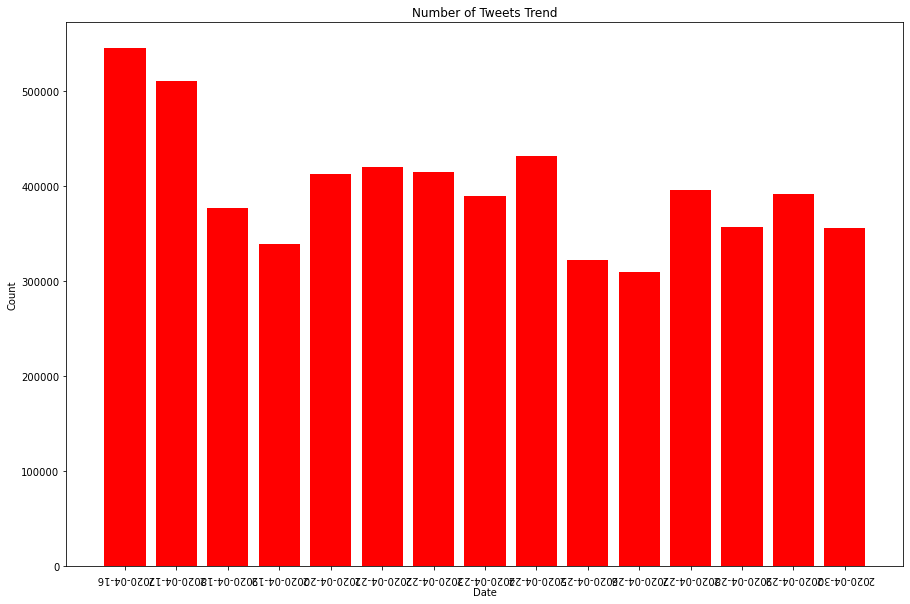

In [63]:
# plot
plt.figure(figsize=(15, 10))
plt.bar(Tweet_Date, num_tweet, color="red")
plt.xticks(rotation=180)
plt.xlabel('Date')
plt.ylabel("Count")
plt.title('Number of Tweets Trend')
plt.show()

Boxplot for reference

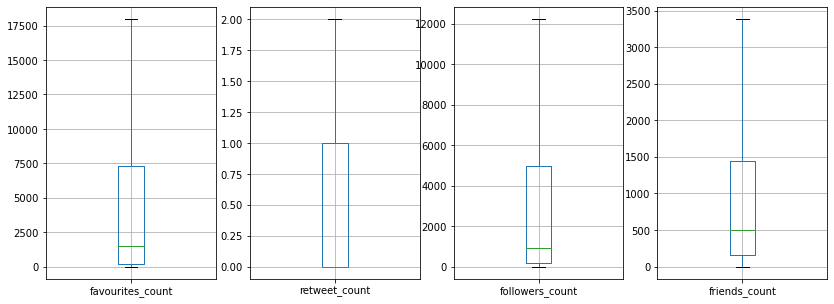

In [64]:
# configure plot size
plt.figure(figsize=(14, 5))
# subplot for favourites_count
plt.subplot(1,4,1)
df.boxplot(column="favourites_count", rot=0, showfliers=False, figsize=(8,6))
# subplot for retweet_count
plt.subplot(1,4,2)
df.boxplot(column="retweet_count", rot=0, showfliers=False, figsize=(8,6))
# subplot for followers_count
plt.subplot(1,4,3)
df.boxplot(column="followers_count", rot=0, showfliers=False, figsize=(8,6))
# subplot for friends_count
plt.subplot(1,4,4)
df.boxplot(column="friends_count", rot=0, showfliers=False, figsize=(8,6))
plt.show()

It can be observed from the boxplots that the mean values of all these four features are much more closer to the first quartile and the bottom than to the third quartile and the top. It indicates, that at least according to this dataset, the Tweet World is like a pyramid, where top accounts achieve much more attention than normal accounts.

Correlation Heatmap for further visualization

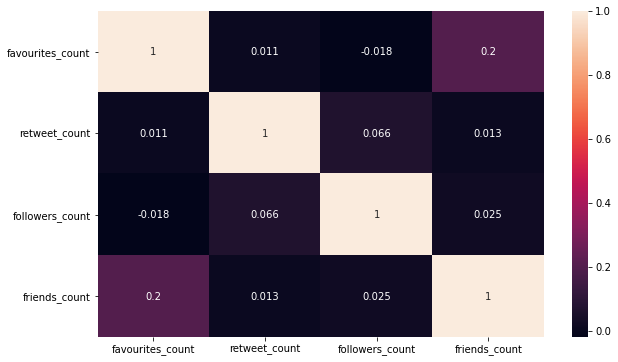

In [65]:
# configure plot size
plt.figure(figsize=(10, 6))
# extract numeric columns
df_corr = df[["favourites_count", "retweet_count", "followers_count", "friends_count"]]
# generate correlation matrix
corrMatrix = df_corr.corr()
# plot heatmap
sns.heatmap(corrMatrix, annot=True)
plt.show()

Creating Wordcloud Visuals

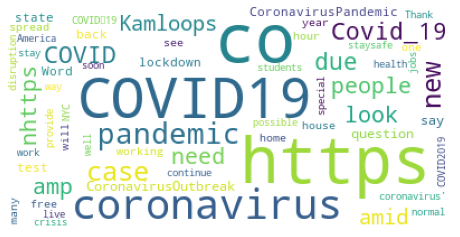

In [66]:
# transform text contents to string variable
text = ""
for date in Tweet_Date:
    text += str(Tweet_Dict[date][Tweet_Dict[date]["lang"]=="en"]["text"].values)
# generate word cloud    
wordcloud = WordCloud(max_font_size=60, max_words=60, background_color="white", collocations=False).generate(str(text))
# plot the WordCloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The Wordcloud Visuals gives us the insight of the most precious terms in the dataset, which undoubtedly showed “COVID19”, “coronavirus”, “pandemic” were the most frequent words.
One interesting fact is that "https" is also a high-frequency word, which is due to the links that people commonly attach in their Tweets.

Pie plots to show the distribution of boolean feature "is_quote" and "is_retweet".

In [67]:
# configure plot size
plt.figure(figsize=(14, 5))

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

Text(0.5, 1.0, 'is_quote')

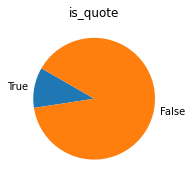

In [68]:
# plot for is_quote
plt.subplot(1,2,1)
plt.pie([df["is_quote"].mean(), 1-df["is_quote"].mean()], labels=['True', 'False'], shadow=False, startangle=150)
plt.title("is_quote")

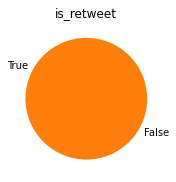

In [69]:
# plot for is_retweet
plt.subplot(1,2,2)
plt.pie([df["is_retweet"].mean(), 1-df["is_retweet"].mean()], labels=['True', 'False'], shadow=False, startangle=150)
plt.title("is_retweet")
plt.show()

Hence, it can be seen that only a small part of all Tweets is a quote of another Tweet.

In [70]:
# count top 10 sources
df["source"].value_counts().head(10)

Twitter Web App        1652000
Twitter for Android    1648715
Twitter for iPhone     1204155
TweetDeck               330128
Twitter Web Client      201592
Hootsuite Inc.          178105
Twitter for iPad        114651
Instagram                85097
Buffer                   59708
Sprout Social            42403
Name: source, dtype: int64

In [71]:
# count top 10 languages
df["lang"].value_counts().head(10)

en     3306188
es      963627
fr      340779
und     282308
it      176646
pt      116234
hi      112696
de      102808
in       69491
tr       62538
Name: lang, dtype: int64

As we could see here that English is in dominating position, so we would only use english text for further analyzation.

**Text classification using "text" feature**

Extract the Tweets we want to use.

In [72]:
# filter out all tweets that are not using english
# analyzing only the Tweet that have favourites over 10 times its average sizes, for reducing dataset dimensionality
df_en = df[(df["lang"]=="en") & (df["favourites_count"]>=df["favourites_count"].mean()*10)]
print("Number of English Tweets that are above average favourites: ", df_en.shape[0])

Number of English Tweets that are above average favourites:  67445


**StopWords**

Analyzing the stopwords of the english language

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.corpus import stopwords

In [74]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [75]:
sentence = "Covid-19 pandemic impacted many countries and what it did to economy is very stressful"

In [76]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [77]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

**TF-iDF Vectorizer**

We first transformed our given text data to numeric arrays using tf-idf technique to further retrieve the beneficial information. tf (term frequency) measures how often the term appears while idf measures how rare the word is. 

In [78]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [79]:
tfidf_features = vectorize_text(['situation is worsening','everyone praying'],30)

In [80]:
tfidf_features

array([[0.        , 0.57735027, 0.57735027, 0.57735027],
       [1.        , 0.        , 0.        , 0.        ]])

**Feature extraction using tfidf**

Note that we consider only 20000 max_features ordered by term frequency across the NLP corpus.

In [81]:
# vectorize the text content
vectorizer = TfidfVectorizer(max_features=20000, stop_words='english')
X = vectorizer.fit_transform(df_en["text"])

In [82]:
print("shape of tf-idf weight matrix is: ", X.shape)

shape of tf-idf weight matrix is:  (67445, 20000)


**Mini-batch K-means Algorithm**

Finding the number of clusters k by plotting the sum of squared distances between each point and the cluster centroid and find the elbow.

In [83]:
# range of number of clusters
num_clusters = range(2, 22, 2)

In [84]:
# list to record sum of squared distances
sum_square_error = []

In [85]:
# iterate through different number of clusters and append sum_square_error
for k in num_clusters:
        sum_square_error.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=42).fit(X).inertia_)
        print('now fitting {} clusters using  Mini batch K-means algorithm'.format(k))

now fitting 2 clusters using  Mini batch K-means algorithm
now fitting 4 clusters using  Mini batch K-means algorithm
now fitting 6 clusters using  Mini batch K-means algorithm
now fitting 8 clusters using  Mini batch K-means algorithm
now fitting 10 clusters using  Mini batch K-means algorithm
now fitting 12 clusters using  Mini batch K-means algorithm
now fitting 14 clusters using  Mini batch K-means algorithm
now fitting 16 clusters using  Mini batch K-means algorithm
now fitting 18 clusters using  Mini batch K-means algorithm
now fitting 20 clusters using  Mini batch K-means algorithm


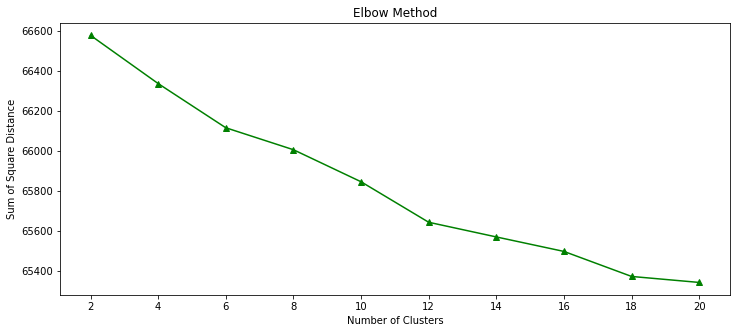

In [86]:
# plot Sum of squared distance versus Number of clusters
plt.figure(figsize=(12, 5))
plt.plot(num_clusters, sum_square_error, "g^-")
plt.xticks(num_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel("Sum of Square Distance")
plt.title('Elbow Method')
plt.show()

It seems that the sum of squared distances does't improve too much when we increase number of clusters.

Normal batch K-means methododology is very time consuming, so we had use Mini batch K-means algorithm to find the optimal number of clusters and that the empirical results suggest that Mini batch K-means algorithm can obtain a substantial saving of computational time although at the expense of some loss of cluster quality.

Now we build the model and predict for each sample.

In [87]:
# perform the mini batch K-means, and predict after fitting the model 
cluster_predictions = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=42).fit_predict(X)

**Visualization**

Using Linear Principal Component Analysis and Non-Liear t-distributed Stochastic Neighbor Embedding methods to visualize the clustering on 2D plane.

In [88]:
import matplotlib.cm as cm

To speed up the process, here we randomly choose 2000 samples as our input data for PCA and use the top 60 eigenvectors as the input of t-SNE. Finally randomly choose 400 data points for better visiualizon.

In [89]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    # extract eigenvectors that have the most explained variance and feed the eigenvectors to t-SNE
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=60).fit_transform(data[max_items,:].todense()))
    
    # random pick centain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')


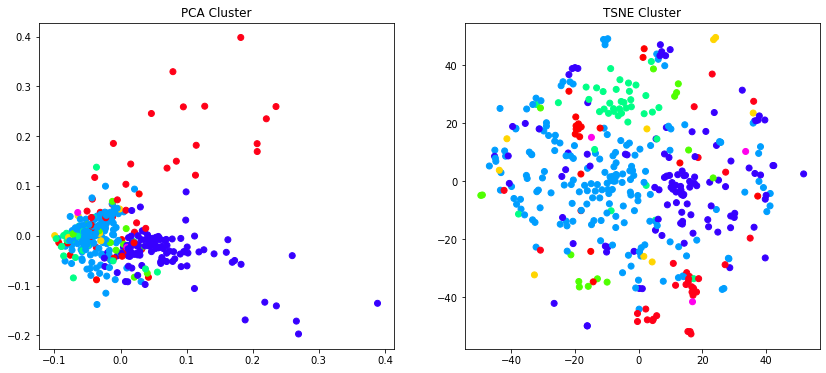

In [90]:
# plot PCA and t-SNE reduced data
plot_tsne_pca(X, cluster_predictions)

It turns out that our clustering result is far from perfect based on the PCA and t-SNE visiualization.

Last step of this project is to observe the extracted key words from the clusters. Note that we only present top 25 keywords for each cluster based on tf-idf weights.

In [91]:
def get_top_keywords(data, clusters, labels, n_terms):
    '''
    This function displays the top keywords based on tf-idf score.
    '''
    # group tf-idf array based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print to 25 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [92]:
# run the code
get_top_keywords(X, cluster_predictions, vectorizer.get_feature_names(), 25)


Cluster 0
death,pandemic,did,testing,died,trumpownseverydeath,vp,covid_19,president,america,gop,dead,amp,presssec,deaths,whitehouse,potus,people,000,americans,trump,coronavirus,https,covid19,realdonaldtrump

Cluster 1
friends,care,covid_19,hope,safe,fabulous,sir,friday,wonderful,blessed,news,beautiful,coronavirus,sister,covid19,smile,health,day,life,prayer,https,happiness,morning,stayhomestaysafe,good

Cluster 2
april,crisis,question,doing,know,lockdown,virus,world,deaths,government,amp,cases,don,need,pandemic,like,covid_19,just,trump,people,coronavirus,covid19,https,right,time

Cluster 3
lives,iran,ve,care,world,work,home,virus,cases,know,testing,don,need,pandemic,health,covid_19,like,just,deaths,trump,people,coronavirus,https,covid19,amp

Cluster 4
health,care,death,000,day,today,home,help,virus,going,testing,know,need,new,pandemic,coronaviruspandemic,don,like,deaths,cases,just,trump,people,https,covid19

Cluster 5
covidー19,vaccine,like,toll,just,million,china,world,testing,usa,000,

Thus, it can be observed that most of the keywords are definitely related to coronavirus.

It can also be seen that more tweets about coronavirus do indicate more infections, which would for sure result in greater public awareness and seriousness. 
People would accept more that they could limit the infection by staying at home only, which could be generalized from noticing the keywords from the tweets such as coronavirus, covid_19, coronacrisis, coronaalert, coronavirusupdate, coronavirusoutbreak, death, pandemic, stayhomestaysafe, lockdown, pandemic, testing, health, and etc.


At last, we observed the extracted key words from the clusters made and concluded that in fact impacted the people’s sentiment towards the epidemic and on the government decision to extend the lockdown. Hence, this project concludes that while the majority of the people throughout the world are taking a positive and hopeful approach, there are instances of fear, sadness and disgust that exhibit still in the world.